In [7]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sb
from sklearn.preprocessing import  LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
pd.options.display.max_columns = 0
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from catboost import CatBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

In [8]:
df_origin = pd.read_csv('train.csv')
final_df = pd.read_csv('df_final.csv')

In [9]:
final_df.shape

(73951, 77)

In [10]:
X = final_df.drop(['log_price'], axis =1)
#X=final_df[important_columns]
y = final_df.log_price

In [11]:
final_df.isnull().sum()[:50]

log_price                              0
accommodates                           0
bathrooms                              0
cleaning_fee                           0
host_has_profile_pic                   0
host_identity_verified                 0
instant_bookable                       0
number_of_reviews                      0
thumbnail_url                          0
property_type_Apartment                0
property_type_Bed & Breakfast          0
property_type_Boat                     0
property_type_Boutique hotel           0
property_type_Bungalow                 0
property_type_Cabin                    0
property_type_Camper/RV                0
property_type_Condominium              0
property_type_Dorm                     0
property_type_Guest suite              0
property_type_Guesthouse               0
property_type_Hostel                   0
property_type_House                    0
property_type_In-law                   0
property_type_Loft                     0
property_type_Ot

In [12]:
# df_random_10_percent = final_df.sample(frac=0.10)

In [13]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)


## XGB Regresor 

In [14]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.2792732831090462

Mean Squarred Error of XGBoost Regressor     :  0.14413290018750266

Root Mean Squarred Error of XGBoost Regressor:  0.3796483902079695

R2 Score of XGBoost Regressor                :  0.7139722806726368


In [15]:
feature_importances = xgb.feature_importances_

In [16]:
sorted_feature_importances = sorted(zip(feature_importances, X.columns), reverse=True)
sorted_feature_importances

[(0.6941195, 'room_type_Entire home/apt'),
 (0.05604602, 'bathrooms'),
 (0.01930958, 'room_type_Private room'),
 (0.01387886, 'LA'),
 (0.012481095, 'property_type_Hostel'),
 (0.012321885, 'accommodates'),
 (0.009532416, 'tv'),
 (0.009350216, 'SF'),
 (0.008605493, 'median_home_value'),
 (0.008194826, 'distance_to_center'),
 (0.0071072113, 'elevator'),
 (0.0069629727, 'DC'),
 (0.0067306585, 'property_type_Apartment'),
 (0.005089989, 'NYC'),
 (0.004777285, 'time_since_last_review'),
 (0.00423435, 'property_type_House'),
 (0.004213074, 'gym'),
 (0.0041391565, 'number_of_reviews'),
 (0.0038840815, 'property_type_Dorm'),
 (0.0035256096, 'cleaning_fee'),
 (0.003446382, 'Chicago'),
 (0.0034362033, 'white_goods'),
 (0.0033053802, 'internet'),
 (0.0032769875, 'thumbnail_url'),
 (0.003222486, 'event_suitable'),
 (0.0029246374, 'property_type_Loft'),
 (0.0028901484, 'bed_type_Real Bed'),
 (0.0027810088, 'room_type_Shared room'),
 (0.0027196554, 'child_friendly'),
 (0.0026902214, 'property_type_Con

In [17]:


important_columns = [feature_name for importance, feature_name in sorted_feature_importances if importance > 0.002]
len(important_columns)

44

In [18]:
important_columns

['room_type_Entire home/apt',
 'bathrooms',
 'room_type_Private room',
 'LA',
 'property_type_Hostel',
 'accommodates',
 'tv',
 'SF',
 'median_home_value',
 'distance_to_center',
 'elevator',
 'DC',
 'property_type_Apartment',
 'NYC',
 'time_since_last_review',
 'property_type_House',
 'gym',
 'number_of_reviews',
 'property_type_Dorm',
 'cleaning_fee',
 'Chicago',
 'white_goods',
 'internet',
 'thumbnail_url',
 'event_suitable',
 'property_type_Loft',
 'bed_type_Real Bed',
 'room_type_Shared room',
 'child_friendly',
 'property_type_Condominium',
 'property_type_Other',
 'super_host',
 'breakfast',
 'bed_type_Pull-out Sofa',
 'property_type_Bed & Breakfast',
 'long_term_stays',
 'host_greeting',
 'parking',
 'hot_tub_sauna_or_pool',
 'Boston',
 'accessible',
 'host_has_profile_pic',
 'air_conditioning',
 'host_since_day']

## XGB Tuning

In [19]:
#df_random_10_percent = final_df.sample(frac=0.10)
X=final_df[important_columns]
y=final_df['log_price']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=101)


In [21]:
# CSV dosyasını kaydediyoruz:
x_test.to_csv('test.csv', index=False)  # index=False, indeks sütununu kaydetmeyeceğimizi belirtir.


In [20]:
from xgboost import XGBRegressor
from sklearn import metrics

xgb = XGBRegressor(objective='reg:squarederror')

xgb.fit(x_train, y_train)

y_pred_xgb = xgb.predict(x_test)

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred_xgb)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred_xgb))
r2_xgb   = metrics.r2_score(y_test, y_pred_xgb)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.280595579822764

Mean Squarred Error of XGBoost Regressor     :  0.14476004218996988

Root Mean Squarred Error of XGBoost Regressor:  0.38047344478947526

R2 Score of XGBoost Regressor                :  0.7127277348650749


In [ ]:
xgb_grid = {
     'colsample_bytree': [0.3,0.6,1], 
     'n_estimators':[1000,1200,1400],
     'max_depth': [6,8,10],
     'learning_rate': [0.005,0.01,0.05]
}
xgb = XGBRegressor()

xgb_cv = GridSearchCV(xgb, 
                      param_grid = xgb_grid, 
                      cv = 10, 
                      n_jobs = -1,
                      verbose = 2)


xgb_cv.fit(x_train, y_train)
"""xgb_grid = {
     'colsample_bytree': [0.3,0.6,1], 
     'n_estimators':[1000,1200,1400],
     'max_depth': [6,8,10],
     'learning_rate': [0.005,0.01,0.05]==========={'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1400}
     
 """

Fitting 10 folds for each of 81 candidates, totalling 810 fits


"#  'n_estimators':[100, 200, 500, 1000],eski hali calisitrdim ve best params bu cikti:\n'colsample_bytree': 0.9,\n 'learning_rate': 0.5,\n 'max_depth': 3,\n 'n_estimators': 1000}\n en son calisan:\n {'colsample_bytree': 0.6,\n 'learning_rate': 0.1,\n 'max_depth': 4,\n 'n_estimators': 1200}\n \n xgb_grid = {\n     'colsample_bytree': [0.3,0.6,1], \n     'n_estimators':[1000,1200,1400],\n     'max_depth': [3,4,5,6],\n     'learning_rate': [0.05,0.1,0.15,0.20]in sonucu:\n     \n colsample_bytree': 0.3,\n 'learning_rate': 0.05,\n 'max_depth': 6,\n 'n_estimators': 1200}\n \n \n \n {'colsample_bytree': 0.3,\n 'learning_rate': 0.05,\n 'max_depth': 8,\n 'n_estimators': 1000}\n \n \n {'colsample_bytree': 0.3,\n 'learning_rate': 0.05,\n 'max_depth': 9,\n 'n_estimators': 600}\n "

In [ ]:
xgb_cv.best_params_

{'colsample_bytree': 0.6,
 'learning_rate': 0.01,
 'max_depth': 10,
 'n_estimators': 1400}

In [22]:
xgb_tuned = XGBRegressor(colsample_bytree = 0.6, 
                         learning_rate = 0.01, 
                         max_depth = 12, 
                         n_estimators = 1600,
                         subsample = 0.8) 

xgb_tuned = xgb_tuned.fit(x_train,y_train)

'''                     colsample_bytree = 0.6, 
                         learning_rate = 0.01, 
                         max_depth = 10, 
                         n_estimators = 1400,
                         subsample = 0.8)

                         R2 Score of XGBoost Regressor                :  0.7308815393207089




                         colsample_bytree = 0.6, 
                         learning_rate = 0.01, 
                         max_depth = 12, 
                         n_estimators = 1600,
                         subsample = 0.8)

                         R2 Score of XGBoost Regressor                :  0.7330870584161624
 
'''

'                     colsample_bytree = 0.6, \n                         learning_rate = 0.01, \n                         max_depth = 10, \n                         n_estimators = 1400,\n                         subsample = 0.8)\n\n                         R2 Score of XGBoost Regressor                :  0.7308815393207089\n\n\n\n\n                         colsample_bytree = 0.6, \n                         learning_rate = 0.01, \n                         max_depth = 12, \n                         n_estimators = 1600,\n                         subsample = 0.8)\n\n                         R2 Score of XGBoost Regressor                :  0.7330870584161624\n \n'

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
y_pred = xgb_tuned.predict(x_test)
np.sqrt(mean_squared_error(y_test, y_pred))

mae_xgb  = metrics.mean_absolute_error(y_test, y_pred)
mse_xgb  = metrics.mean_squared_error(y_test, y_pred)
rmse_xgb = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
r2_xgb   = metrics.r2_score(y_test, y_pred)


print('\nMean Absolute Error of XGBoost Regressor     : ', mae_xgb)
print('\nMean Squarred Error of XGBoost Regressor     : ', mse_xgb)
print('\nRoot Mean Squarred Error of XGBoost Regressor: ', rmse_xgb)
print('\nR2 Score of XGBoost Regressor                : ', r2_xgb)


Mean Absolute Error of XGBoost Regressor     :  0.26835914352609214

Mean Squarred Error of XGBoost Regressor     :  0.13450072761663154

Root Mean Squarred Error of XGBoost Regressor:  0.36674340841606345

R2 Score of XGBoost Regressor                :  0.7330870584161624


In [ ]:
"""tum data defaulut icin
Mean Absolute Error of XGBoost Regressor     :  0.2795925161882165

Mean Squarred Error of XGBoost Regressor     :  0.14418058411918838

Root Mean Squarred Error of XGBoost Regressor:  0.3797111851383738

R2 Score of XGBoost Regressor                :  0.7138776532405178


importance ile default params(000.4)

Mean Absolute Error of XGBoost Regressor     :  0.2808757643863328

Mean Squarred Error of XGBoost Regressor     :  0.14515827309834897

Root Mean Squarred Error of XGBoost Regressor:  0.3809964213721029

R2 Score of XGBoost Regressor                :  0.71193745673745


importance ile default params(0.006)
0.69

importance ile default params(0.003)

Mean Absolute Error of XGBoost Regressor     :  0.2865505511198461

Mean Squarred Error of XGBoost Regressor     :  0.15081581432985805

Root Mean Squarred Error of XGBoost Regressor:  0.3883501182307765

R2 Score of XGBoost Regressor                :  0.7007102240005528

"""

In [24]:
import joblib

In [ ]:
#joblib.dump(xgb_tuned,'xgb_2.joblib')

['xgb_2.joblib']

In [25]:
import joblib
filename = 'XGB_model.sav'
joblib.dump(xgb_tuned, filename)

['XGB_model.sav']

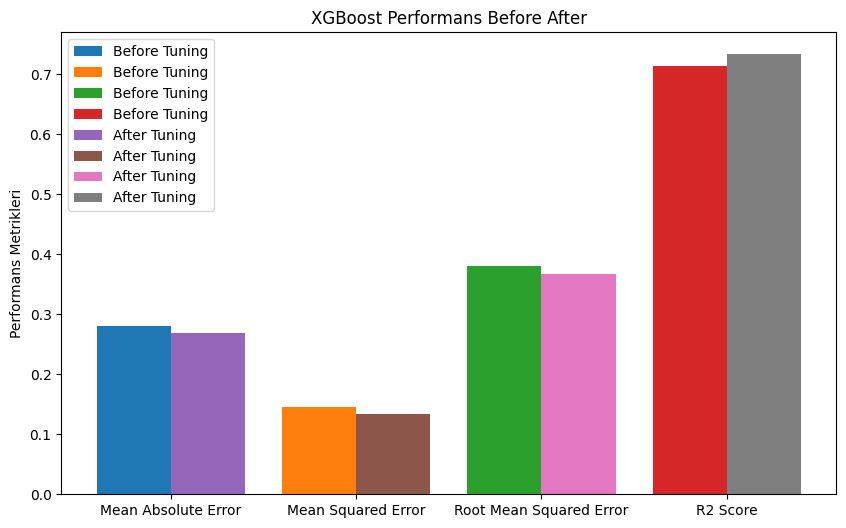

In [1]:
import matplotlib.pyplot as plt

# Performans metrikleri ve algoritma isimleri
metrics = ["Mean Absolute Error", "Mean Squared Error", "Root Mean Squared Error", "R2 Score"]
before_tuning_scores = [0.280595579822764, 0.14476004218996988, 0.38047344478947526, 0.7127277348650749]
after_tuning_scores = [0.26835914352609214, 0.13450072761663154, 0.36674340841606345, 0.7330870584161624]

# Grafik çizimi
plt.figure(figsize=(10, 6))

# Önceki durum çubukları
for i in range(len(metrics)):
    plt.bar(i - 0.2, before_tuning_scores[i], width=0.4, align='center', label='Before Tuning')

# Ayarlandıktan sonraki durum çubukları
for i in range(len(metrics)):
    plt.bar(i + 0.2, after_tuning_scores[i], width=0.4, align='center', label='After Tuning')

plt.xticks(range(len(metrics)), metrics)
plt.ylabel("Performans Metrikleri")
plt.legend(loc='best')
plt.title("XGBoost Performans Before After")
plt.show()
